In [ ]:
import tensorflow_hub as tf_hub
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as display
import tensorflow as tf
import os

import PIL.Image

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
content_path = '/content/drive/MyDrive/Colab Notebooks/BMW.jpeg'

style_path = '/content/drive/MyDrive/Colab Notebooks/2.jpeg'


In [ ]:
def imshow(img, title = None):
  if len(img.shape) > 3:
    img = tf.squeeze(img, axis = 0)

  plt.imshow(img)
  if title:
    plt.title(title)
  plt.axis('off')
  plt.show()

In [ ]:
def load_image(path_img):
  max_img = 512

  img = tf.io.read_file(path_img)
  img = tf.image.decode_image(img, channels = 3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_img / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)
  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img


In [ ]:
def tensor_to_image(tensor):
  tensor = tensor * 255
  tensor = np.array(tensor, dtype=np.uint8)

  if np.ndim(tensor)> 3:
    assert tensor.shape[0]==1
    tensor = tensor[0]

    return PIL.Image.fromarray(tensor)

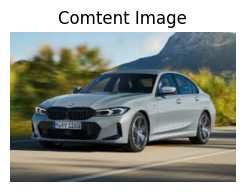

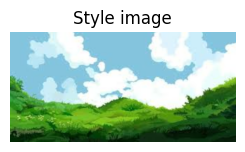

In [ ]:
content_img = load_image(content_path)
style_img = load_image(style_path)

plt.subplot(1,2,1)
imshow(content_img, "Comtent Image")

plt.subplot(1,2,2)
imshow(style_img, "Style image")

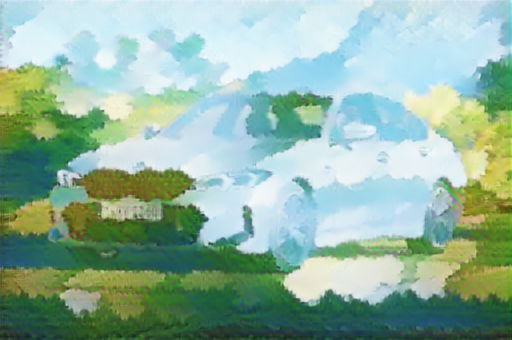

In [ ]:
hub_model = tf_hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

stylized_img = hub_model(tf.constant(content_img), tf.constant(style_img))[0]

result_img = tensor_to_image(stylized_img)

result_img